In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv')

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

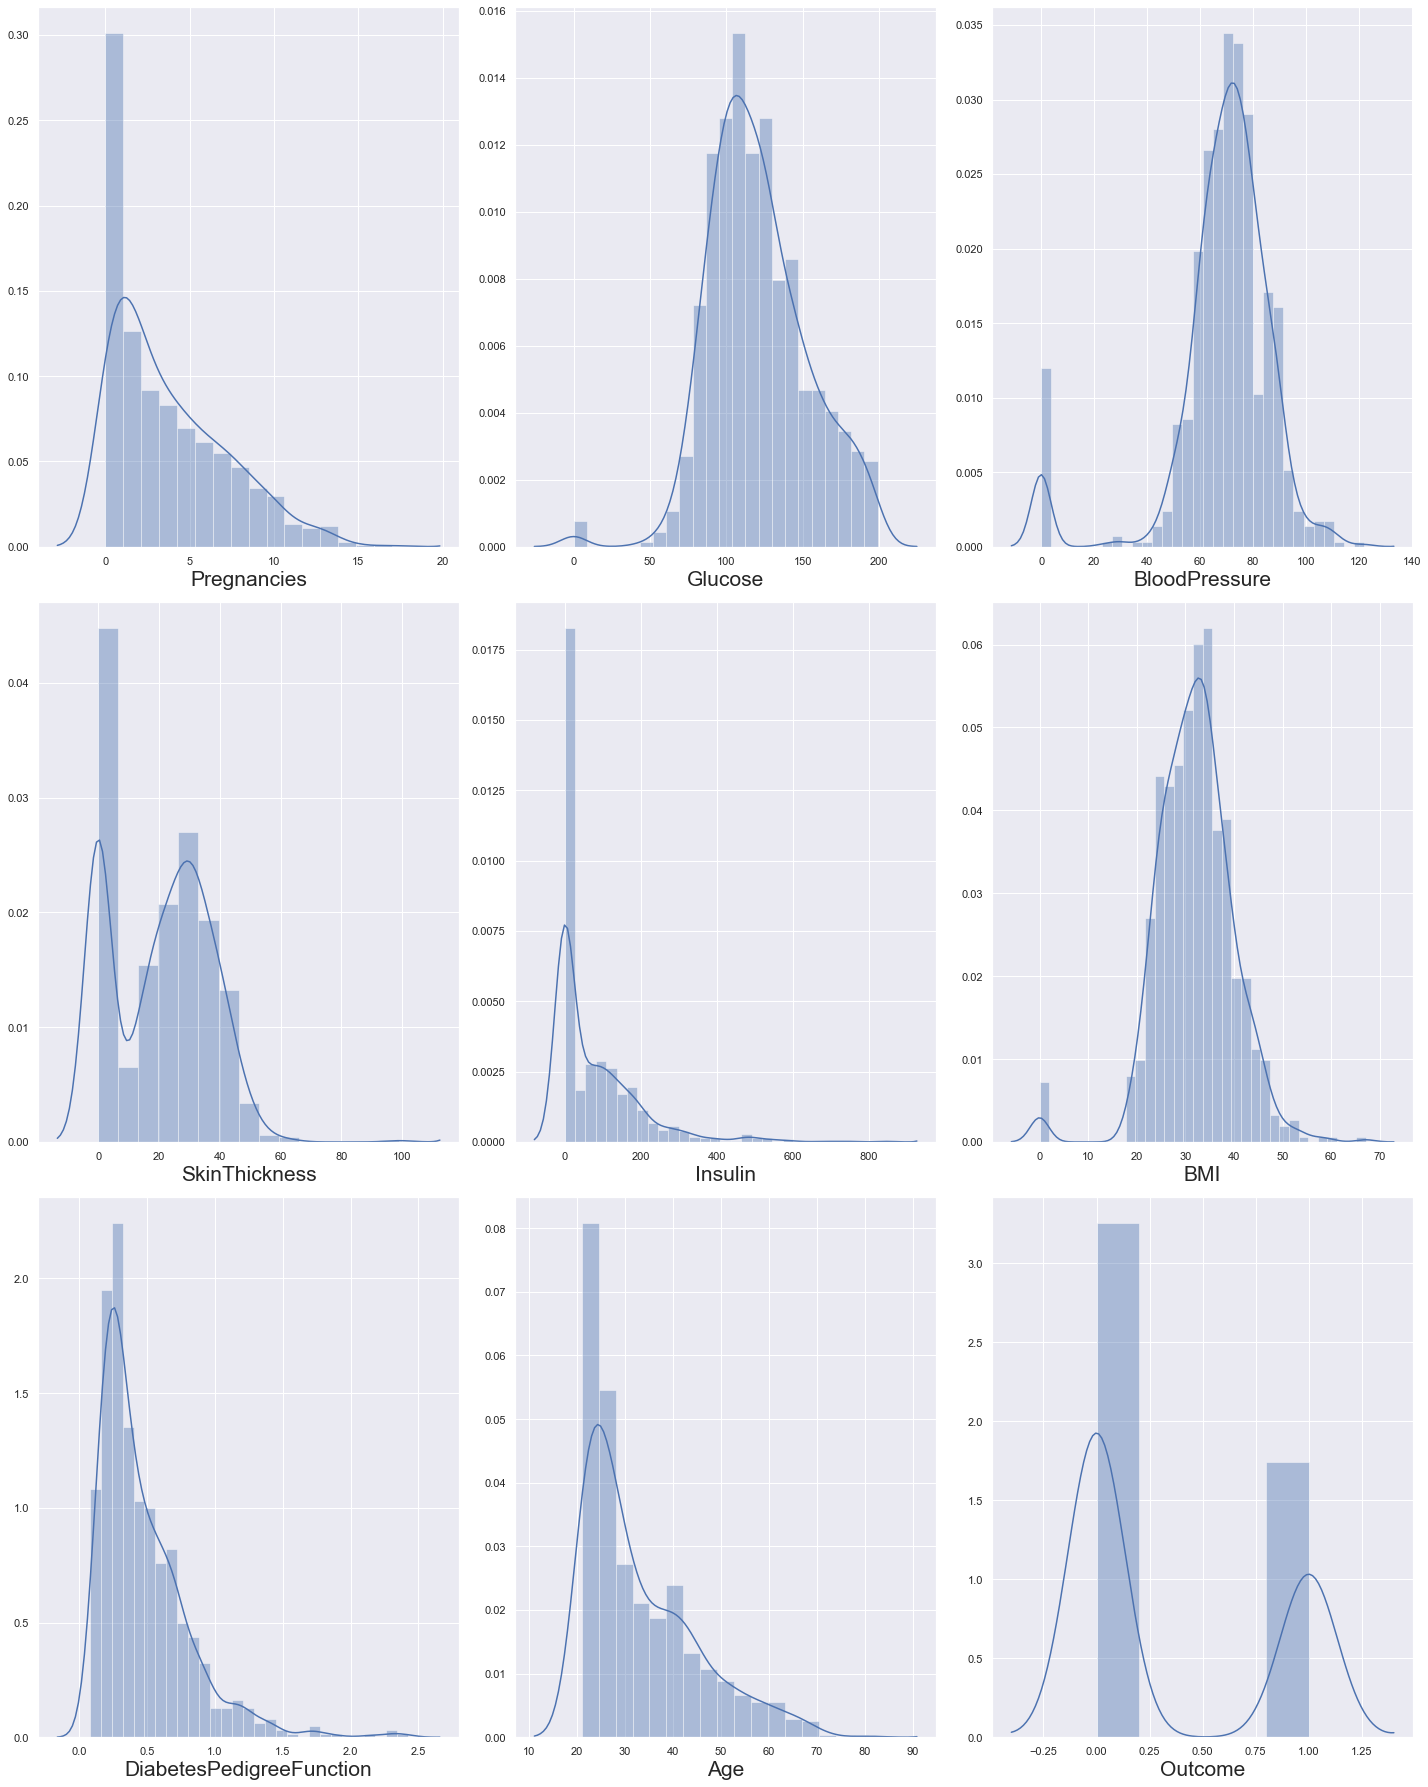

In [18]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for col in df:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col, fontsize = 21)
    plotnumber+=1
plt.tight_layout()
plt.show()

In [39]:
df[df['BMI']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [27]:
df[df['Glucose']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [26]:
df['Glucose'].replace(0, round(df['Glucose'].mean()), inplace=True)

In [24]:
df['Glucose'].mean()

120.89453125

In [31]:
df['BloodPressure'].replace(0,round(df['BloodPressure'].mean()), inplace=True)

In [33]:
df['SkinThickness'].replace(0,round(df['SkinThickness'].mean()), inplace=True)

In [38]:
df['BMI'].replace(0,round(df['Insulin'].mean()), inplace=True)

In [41]:
plt.figure(figsize=(20,25), facecolor='white')

<Figure size 1440x1800 with 0 Axes>

<Figure size 1440x1800 with 0 Axes>

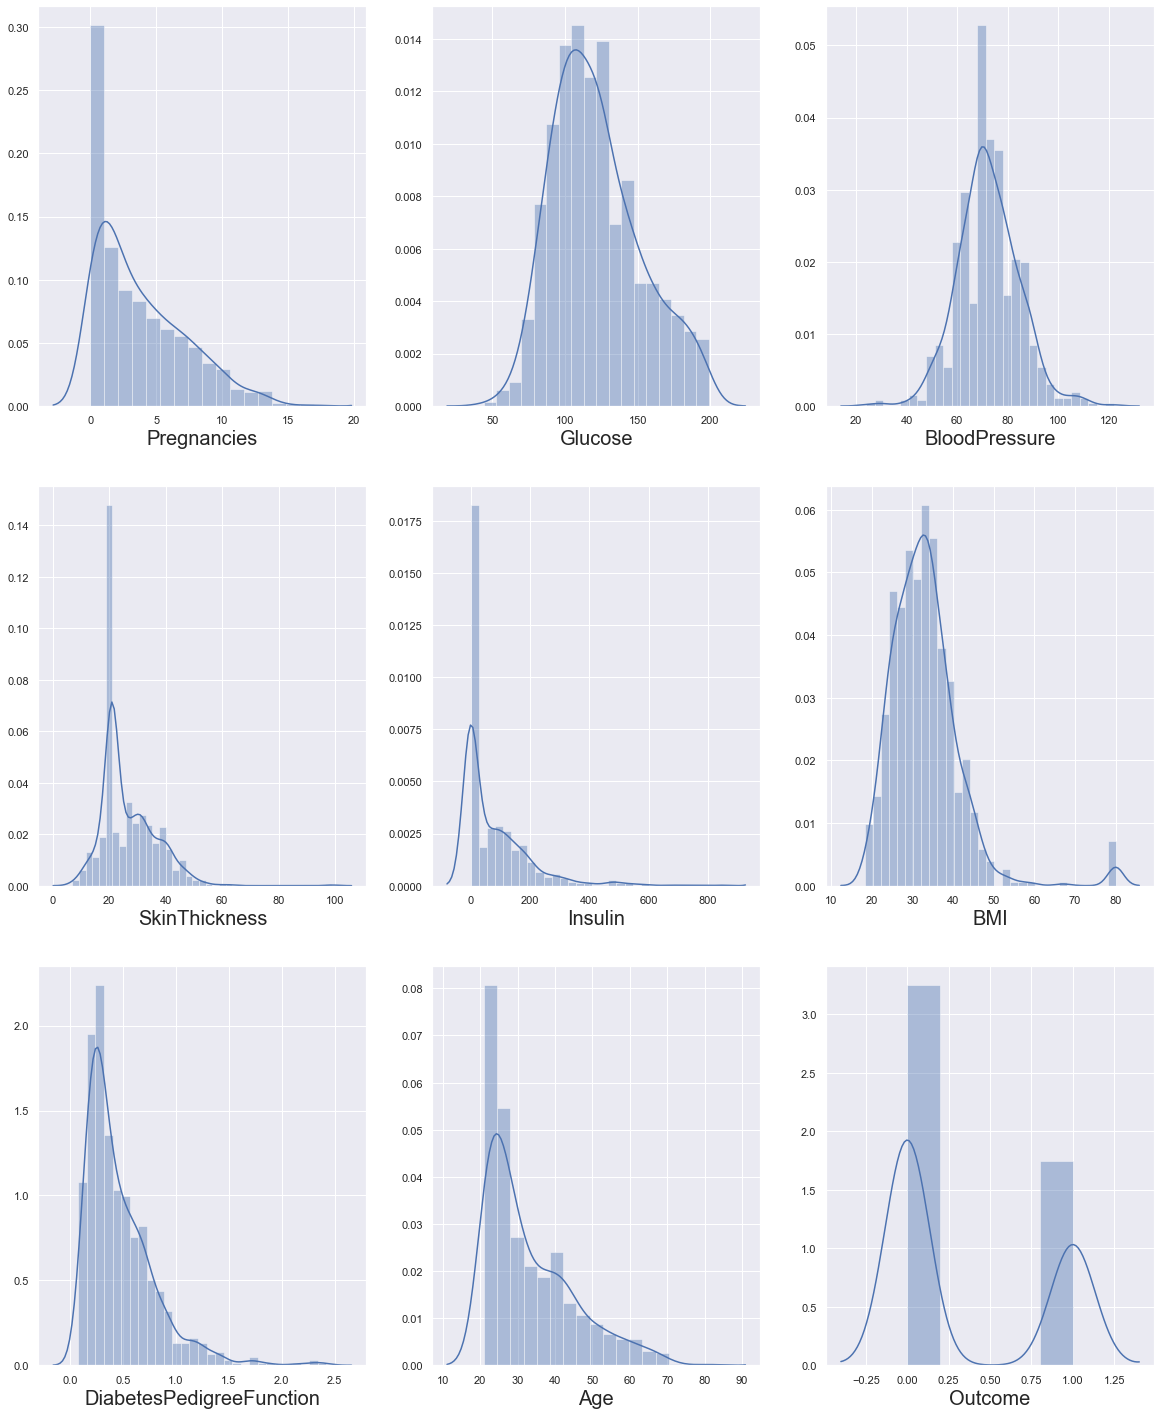

In [46]:
plt.figure(figsize=(20,25), facecolor='white')
pltnumber = 1

for col in df:
    if pltnumber<=9:
        ax = plt.subplot(3,3,pltnumber)
        sns.distplot(df[col])
        plt.xlabel(col, fontsize = 20)
    pltnumber+=1
plt.show()

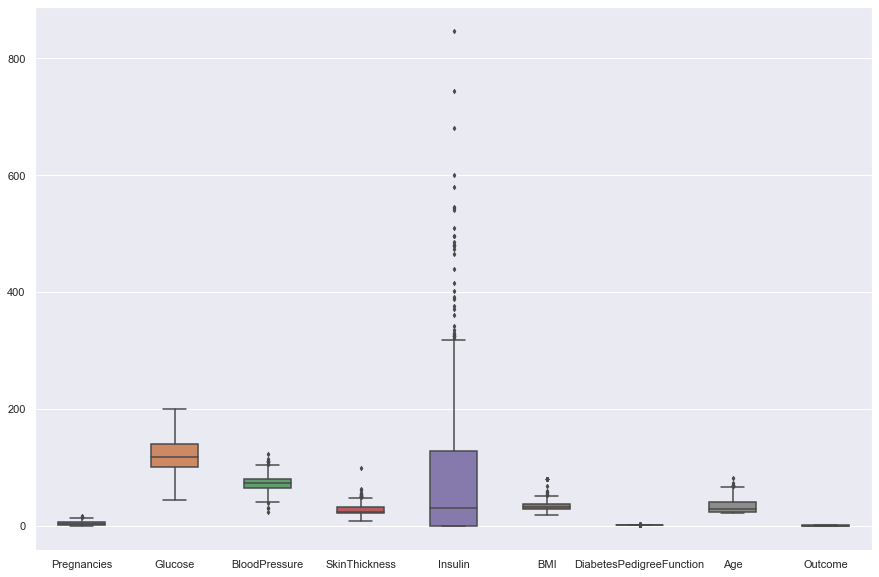

In [52]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df, ax = ax, fliersize = 3, width=0.5)

In [55]:
q = df['Pregnancies'].quantile(0.98)

In [59]:
data_cleaned = df[df['Pregnancies']<q]

In [63]:
q = data_cleaned['BMI'].quantile(0.99)

In [67]:
data_cleaned = data_cleaned[data_cleaned['BMI']<q]

In [70]:
q = data_cleaned['SkinThickness'].quantile(0.99)

In [74]:
data_cleaned = data_cleaned[data_cleaned['SkinThickness']<q]

In [77]:
q = data_cleaned['Insulin'].quantile(0.95)

In [81]:
data_cleaned = data_cleaned[data_cleaned['Insulin']<q]

In [82]:
data_cleaned

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,21,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,21,0,30.1,0.349,47,1


In [85]:
q = data_cleaned['DiabetesPedigreeFunction'].quantile(0.99)

In [89]:
data_cleaned = data_cleaned[data_cleaned['DiabetesPedigreeFunction']<q]

In [92]:
q = data_cleaned['Age'].quantile(0.99)

In [96]:
data_cleaned = data_cleaned[data_cleaned['Age']<q]

In [97]:
data_cleaned

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,21,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,21,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,21,0,30.1,0.349,47,1


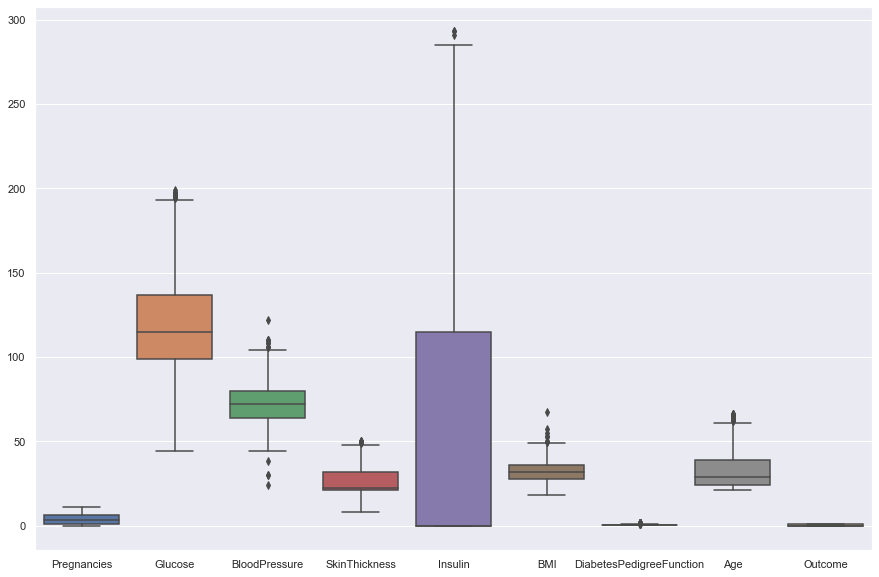

In [101]:
fig, ax = plt.subplots(figsize = (15,10))
sns.boxplot(data=data_cleaned, ax =ax)

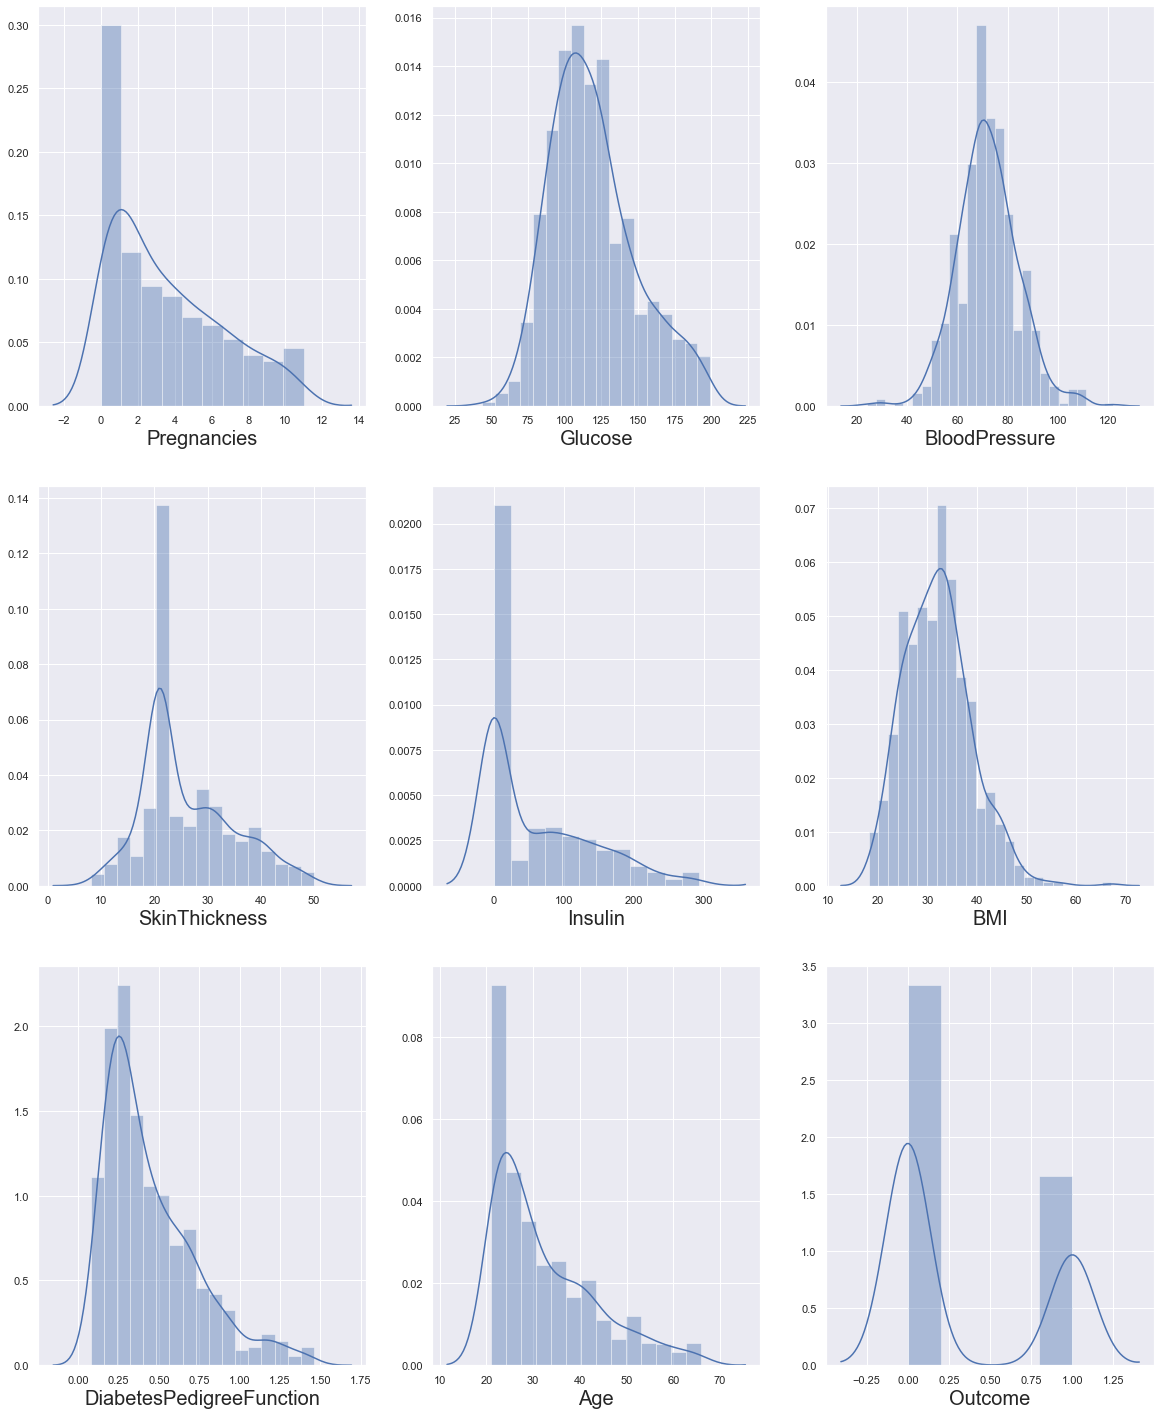

In [109]:
plt.figure(figsize=(20,25), facecolor='white')
pltnumber = 1

for col in data_cleaned:
    if pltnumber<=9:
        ax = plt.subplot(3,3,pltnumber)
        sns.distplot(data_cleaned[col])
        plt.xlabel(col, fontsize = 20)
    pltnumber+=1
plt.show()

In [110]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,21,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,21,0,30.1,0.349,47,1


In [112]:
X = df.drop(columns=['Outcome'])

In [114]:
y = df.Outcome

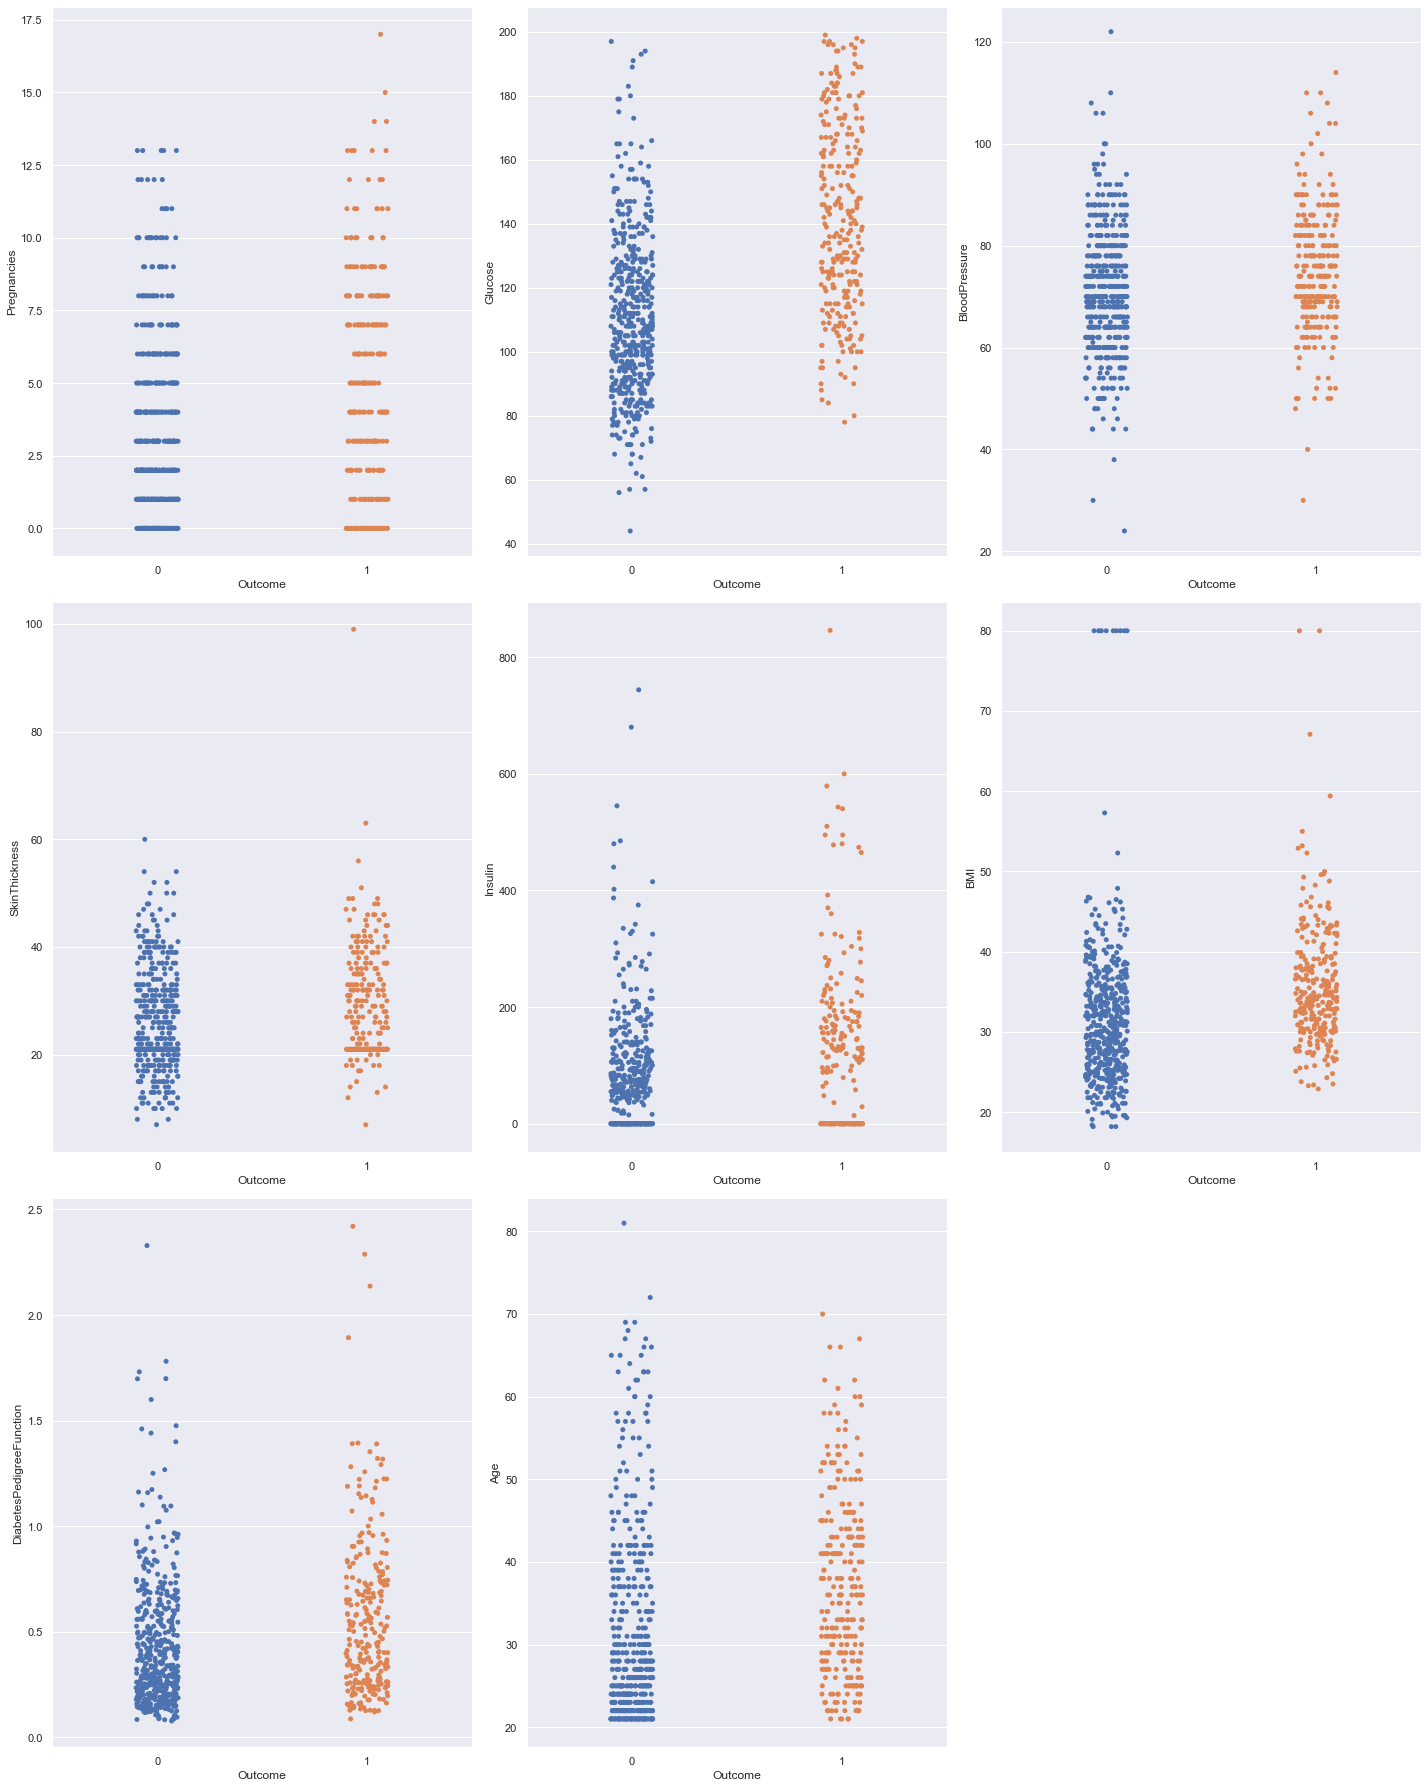

In [118]:
plt.figure(figsize=(20,25), facecolor='white')
pltnumber = 1

for col in X:
    if pltnumber<=9:
        ax = plt.subplot(3,3,pltnumber)
        sns.stripplot(y = X[col], x = y)
    pltnumber+=1
plt.tight_layout()

In [119]:
from sklearn.preprocessing import StandardScaler

In [120]:
ss = StandardScaler()

In [121]:
X_scaled = ss.fit_transform(X)

In [122]:
X_scaled

array([[ 0.63994726,  0.86525364, -0.02064527, ...,  0.05189453,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20601255, -0.51613175, ..., -0.73508716,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.01595708, -0.68129391, ..., -1.10609282,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.02243187, -0.02064527, ..., -0.78005755,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14195434, -1.01161824, ..., -0.34159632,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94299462, -0.18580743, ..., -0.30786853,
        -0.47378505, -0.87137393]])

In [124]:
vif = pd.DataFrame()

In [125]:
vif

""


In [126]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [127]:
variables = X_scaled

In [132]:
vif['VIF'] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]

In [133]:
vif

,VIF
0,1.433030
1,1.280765
2,1.220237
3,1.264637
4,1.256191
5,1.218791
6,1.061812
7,1.609573


In [134]:
vif['Features'] = X.columns

In [135]:
vif

,VIF,Features
0,1.433030,Pregnancies
1,1.280765,Glucose
2,1.220237,BloodPressure
3,1.264637,SkinThickness
4,1.256191,Insulin
5,1.218791,BMI
6,1.061812,DiabetesPedigreeFunction
7,1.609573,Age


In [136]:
from sklearn.model_selection import train_test_split

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size = 0.25, random_state = 355)

In [139]:
from sklearn.linear_model import LogisticRegression

In [140]:
lgr = LogisticRegression()

In [141]:
lgr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [142]:
import pickle

In [144]:
with open("myModel_for_prediction.pickle", "wb") as f:
    pickle.dump(lgr, f)

In [145]:
with open('standardscalermodel.sav', "wb") as f:
    pickle.dump(ss, f)

In [147]:
y_pred = lgr.predict(X_test)

In [180]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve


In [152]:
accuracy = accuracy_score(y_test,y_pred)

In [153]:
print(accuracy)

0.7604166666666666


In [155]:
conf_mat = confusion_matrix(y_test,y_pred)

In [156]:
print(conf_mat)

[[110  15]
 [ 31  36]]


In [163]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [165]:
accu = (true_positive+true_negative)/(true_negative+true_positive+false_negative+false_positive)

In [166]:
print(accu)

0.7604166666666666


In [169]:
Precision = true_positive/(true_positive+false_positive)
Precision

0.88

In [172]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.7801418439716312

In [176]:
F1_Score = 2*(Precision*Recall)/(Precision+Recall)
F1_Score

0.8270676691729324

In [179]:
auc = roc_auc_score(y_test,y_pred)

In [182]:
fpr, tpr, thresholds = roc_curve(y_test,y_pred)

In [183]:
fpr

array([0.  , 0.12, 1.  ])

In [184]:
tpr

array([0.        , 0.53731343, 1.        ])

In [185]:
thresholds

array([2, 1, 0], dtype=int64)

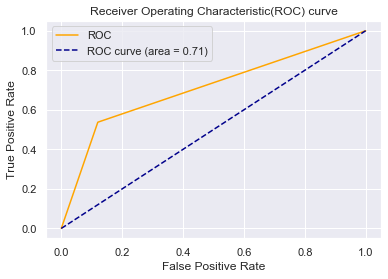

In [194]:
plt.plot(fpr,tpr,color = 'orange', label = 'ROC')
plt.plot([0,1],[0,1], color ='darkblue', linestyle = 'dashed', label= 'ROC curve (area = %0.2f)'%auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic(ROC) curve')
plt.legend()
plt.show()